In [69]:
import os
import json

# Define the main folder path
folder_path = '/scratch/ybt7qf/ds6050-group1-project/ECP'

# Function to recursively search for JSON files
def find_json_files(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

# Get a list of JSON files in subfolders
json_files = find_json_files(folder_path)

identities = set()
# Iterate over the JSON files and load their contents
for json_file in json_files:
    with open(json_file, 'r') as file:
        data = json.load(file)
        # Process the loaded JSON data here
        for item in data['children']:
            identities.add(item['identity'])

identity_mapping = {value: index for index, value in enumerate(identities)}
identity_mapping

{'wheelchair-group': 0,
 'pedestrian': 1,
 'bicycle-group': 2,
 'rider+vehicle-group-far-away': 3,
 'bicycle': 4,
 'rider': 5,
 'buggy-group': 6,
 'motorbike-group': 7,
 'motorbike': 8,
 'person-group-far-away': 9,
 'scooter-group': 10,
 'tricycle-group': 11,
 None: 12}

In [95]:
# Define the main folder path
# main_folder_path = '/scratch/ybt7qf/ds6050-group1-project/ECP/day/labels/train/'
# main_folder_path = '/scratch/ybt7qf/ds6050-group1-project/ECP/night/labels/train/'
# main_folder_path = '/scratch/ybt7qf/ds6050-group1-project/ECP/day/labels/val/'
main_folder_path = '/scratch/ybt7qf/ds6050-group1-project/ECP/night/labels/val/'

json_files = find_json_files(main_folder_path)

save_dir = "/scratch/ybt7qf/ds6050-group1-project/datasets/eurocitypersonsdataset/labels/val/"

# Function to normalize coordinates
def normalize_coordinates(x0, y0, x1, y1, image_width, image_height):
    normalized_x0 = x0 / image_width
    normalized_y0 = y0 / image_height
    normalized_width = (x1 - x0) / image_width
    normalized_height = (y1 - y0) / image_height
    return normalized_x0, normalized_y0, normalized_width, normalized_height

# Iterate over subfolders and process JSON files
for json_file in json_files:
    # Get the base name (with extension)
    base_name = os.path.basename(json_file)

    # Get the file name without extension
    file_name_without_extension = os.path.splitext(base_name)[0]

    with open(json_file, 'r') as file:
        data = json.load(file)

    children = data.get('children', [])
    with open(save_dir+f"{file_name_without_extension}.txt", 'w') as txt_file:
        for child in children:
            identity = child.get('identity', None)
            if identity:
                identity_index = identity_mapping[identity]
                x0, y0, x1, y1 = child['x0'], child['y0'], child['x1'], child['y1']
                normalized_x0, normalized_y0, normalized_width, normalized_height = normalize_coordinates(
                    x0, y0, x1, y1, data['imagewidth'], data['imageheight']
                )

                # Save data in the text file
                txt_file.write(f"{identity_index} {normalized_x0} {normalized_y0} {normalized_width} {normalized_height}\n")
            else:
                print(f"no labels for {json_file}")
print("Processing completed.")

Processing completed.


In [80]:
# json_file = "/scratch/ybt7qf/ds6050-group1-project/ECP/night/labels/train/koeln/koeln_00321.json"
# with open(json_file, 'r') as file:
#     data = json.load(file)
# data

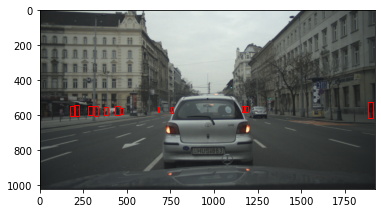

In [88]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Load bounding box data from the text file
text_file_path = '/scratch/ybt7qf/ds6050-group1-project/datasets/eurocitypersonsdataset/labels/train/budapest_00794.txt'  # Update with your text file path
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        data = line.strip().split()
        identity, x0, y0, width, height = data
        x0, y0, width, height = float(x0), float(y0), float(width), float(height)
        boxes.append((identity, x0, y0, width, height))

# Load the image
image_path = '/scratch/ybt7qf/ds6050-group1-project/ECP/day/img/train/budapest/budapest_00794.png'  # Update with your image file path
image = Image.open(image_path)

# Create a plot to display the image and bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot bounding boxes on the image
for identity, x0, y0, width, height in boxes:
    x0_unnormalized = x0 * image.width
    y0_unnormalized = y0 * image.height
    width_unnormalized = width * image.width
    height_unnormalized = height * image.height

    rect = Rectangle((x0_unnormalized, y0_unnormalized), width_unnormalized, height_unnormalized, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # ax.annotate(identity, (x0_unnormalized, y0_unnormalized), color='r', fontsize=10, backgroundcolor='w')

# Set axis limits
ax.set_xlim(0, image.width)
ax.set_ylim(image.height, 0)

# Show the image with bounding boxes
plt.show()
